# BIG FIVE

In [28]:
# BASE PACKAGES:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from pathlib import Path

# CLUSTERING:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture

#WARNING SUPPRESSION:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# PANDAS DISPLAY SETTINGS:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


In [ ]:
# Da More robust
from sklearn.model_selection import TimeSeriesSplit, GroupKFold, StratifiedGroupKFold
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import roc_auc_score, f1_score
import lightgbm as lgb

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

import missingno as msno

from sklearn.model_selection import StratifiedGroupKFold
from sklearn.base import BaseEstimator, ClassifierMixin

import lightgbm as lgb

In [3]:
raw_data=pd.read_csv('C:/Users/TirocinioMatteo/Desktop/Python_3/Vai/ai/big 5/clusterizzazione/dataset/data-final.csv', delimiter='\t')

In [4]:
data = raw_data.copy()
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0


In [5]:
print("Dateset originale:",data.shape)

# SOLO DOMANDE  
data_Q=data.drop(data.columns[50:110], axis=1)
print("Dataset con le sole 50 domande:", data_Q.shape)
#data_Q.to_csv('C:/Users/TirocinioMatteo/Desktop/Python_3/BIG_FIVE/Dataset/data_Q.csv', index=False)

# Elimino i record/partecipanti con valori nulli
data_Q_Xmv=data_Q.dropna()
print("Dataset con 50 domande senza valori mancanti:", data_Q_Xmv.shape)

Dateset originale: (1015341, 110)
Dataset con le sole 50 domande: (1015341, 50)
Dataset con 50 domande senza valori mancanti: (1013558, 50)


Elimino record che presentano il valore zero (da discutere se appropriato o meno)

In [6]:
# elimino tutti i record con risposte uguali a 0
data_Q_Xmv_X0 = data_Q_Xmv[(data_Q_Xmv != 0).all(axis=1)]
print("Dataset con 50 domande e Nazione senza valori mancanti e senza zeri:", data_Q_Xmv_X0.shape)

Dataset con 50 domande e Nazione senza valori mancanti e senza zeri: (874434, 50)


Tengo solo alcune features

In [7]:
# tengo solo le 12 doamnde che mi interessano
to_keep=['EST3', 'EST4', 'EST5', 'EST6',  'EST9', 'EST10', 'CSN1', 'CSN4', 'CSN5', 'CSN8', 'CSN9', 'CSN10']
data_12_items = data_Q_Xmv_X0[to_keep]

CALCOLO IL PUNTEGGIO

In [8]:
data_12_items["EST_score"]= -data_12_items["EST3"]+data_12_items["EST4"]-data_12_items["EST5"]-data_12_items["EST6"]-data_12_items["EST9"]-data_12_items["EST10"]    

data_12_items["CSN_score"]= +data_12_items["CSN1"]-data_12_items["CSN4"]+data_12_items["CSN5"]-data_12_items["CSN8"]+data_12_items["CSN9"]+data_12_items["CSN10"]


C:\Users\TirocinioMatteo\AppData\Local\Temp\ipykernel_21028\2311475751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_12_items["EST_score"]= -data_12_items["EST3"]+data_12_items["EST4"]-data_12_items["EST5"]-data_12_items["EST6"]-data_12_items["EST9"]-data_12_items["EST10"]
C:\Users\TirocinioMatteo\AppData\Local\Temp\ipykernel_21028\2311475751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_12_items["CSN_score"]= +data_12_items["CSN1"]-data_12_items["CSN4"]+data_12_items["CSN5"]-data_12_i

In [9]:
# Sommo i valori di determinate rispsote per ciascuna domanda

""" 
data_Q_Xmv_X0["EXT_score"]= 20 +data_Q_Xmv_X0["EXT1"]-data_Q_Xmv_X0["EXT2"]+data_Q_Xmv_X0["EXT3"]-data_Q_Xmv_X0["EXT4"]+data_Q_Xmv_X0["EXT5"]-data_Q_Xmv_X0["EXT6"]+data_Q_Xmv_X0["EXT7"]-data_Q_Xmv_X0["EXT8"]+data_Q_Xmv_X0["EXT9"]-data_Q_Xmv_X0["EXT10"]

data_Q_Xmv_X0["AGR_score"]= 14 -data_Q_Xmv_X0["AGR1"]+data_Q_Xmv_X0["AGR2"]-data_Q_Xmv_X0["AGR3"]+data_Q_Xmv_X0["AGR4"]-data_Q_Xmv_X0["AGR5"]+data_Q_Xmv_X0["AGR6"]-data_Q_Xmv_X0["AGR7"]+data_Q_Xmv_X0["AGR8"]+data_Q_Xmv_X0["AGR9"]+data_Q_Xmv_X0["AGR10"]

data_Q_Xmv_X0["CSN_score"]= 14 +data_Q_Xmv_X0["CSN1"]-data_Q_Xmv_X0["CSN2"]+data_Q_Xmv_X0["CSN3"]-data_Q_Xmv_X0["CSN4"]+data_Q_Xmv_X0["CSN5"]-data_Q_Xmv_X0["CSN6"]+data_Q_Xmv_X0["CSN7"]-data_Q_Xmv_X0["CSN8"]+data_Q_Xmv_X0["CSN9"]+data_Q_Xmv_X0["CSN10"]

data_Q_Xmv_X0["EST_score"]= 38 -data_Q_Xmv_X0["EST1"]+data_Q_Xmv_X0["EST2"]-data_Q_Xmv_X0["EST3"]+data_Q_Xmv_X0["EST4"]-data_Q_Xmv_X0["EST5"]-data_Q_Xmv_X0["EST6"]-data_Q_Xmv_X0["EST7"]-data_Q_Xmv_X0["EST8"]-data_Q_Xmv_X0["EST9"]-data_Q_Xmv_X0["EST10"]    

data_Q_Xmv_X0["OPN_score"]= 8 +data_Q_Xmv_X0["OPN1"]-data_Q_Xmv_X0["OPN2"]+data_Q_Xmv_X0["OPN3"]-data_Q_Xmv_X0["OPN4"]+data_Q_Xmv_X0["OPN5"]-data_Q_Xmv_X0["OPN6"]+data_Q_Xmv_X0["OPN7"]+data_Q_Xmv_X0["OPN8"]+data_Q_Xmv_X0["OPN9"]+data_Q_Xmv_X0["OPN10"]

"""


' \ndata_Q_Xmv_X0["EXT_score"]= 20 +data_Q_Xmv_X0["EXT1"]-data_Q_Xmv_X0["EXT2"]+data_Q_Xmv_X0["EXT3"]-data_Q_Xmv_X0["EXT4"]+data_Q_Xmv_X0["EXT5"]-data_Q_Xmv_X0["EXT6"]+data_Q_Xmv_X0["EXT7"]-data_Q_Xmv_X0["EXT8"]+data_Q_Xmv_X0["EXT9"]-data_Q_Xmv_X0["EXT10"]\n\ndata_Q_Xmv_X0["AGR_score"]= 14 -data_Q_Xmv_X0["AGR1"]+data_Q_Xmv_X0["AGR2"]-data_Q_Xmv_X0["AGR3"]+data_Q_Xmv_X0["AGR4"]-data_Q_Xmv_X0["AGR5"]+data_Q_Xmv_X0["AGR6"]-data_Q_Xmv_X0["AGR7"]+data_Q_Xmv_X0["AGR8"]+data_Q_Xmv_X0["AGR9"]+data_Q_Xmv_X0["AGR10"]\n\ndata_Q_Xmv_X0["CSN_score"]= 14 +data_Q_Xmv_X0["CSN1"]-data_Q_Xmv_X0["CSN2"]+data_Q_Xmv_X0["CSN3"]-data_Q_Xmv_X0["CSN4"]+data_Q_Xmv_X0["CSN5"]-data_Q_Xmv_X0["CSN6"]+data_Q_Xmv_X0["CSN7"]-data_Q_Xmv_X0["CSN8"]+data_Q_Xmv_X0["CSN9"]+data_Q_Xmv_X0["CSN10"]\n\ndata_Q_Xmv_X0["EST_score"]= 38 -data_Q_Xmv_X0["EST1"]+data_Q_Xmv_X0["EST2"]-data_Q_Xmv_X0["EST3"]+data_Q_Xmv_X0["EST4"]-data_Q_Xmv_X0["EST5"]-data_Q_Xmv_X0["EST6"]-data_Q_Xmv_X0["EST7"]-data_Q_Xmv_X0["EST8"]-data_Q_Xmv_X0["EST9"

In [10]:
data_12_items.head()

,EST3,EST4,EST5,EST6,EST9,EST10,CSN1,CSN4,CSN5,CSN8,CSN9,CSN10,EST_score,CSN_score
0,4.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,-11.0,9.0
1,4.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,5.0,3.0,-11.0,8.0
2,4.0,2.0,2.0,2.0,1.0,3.0,4.0,2.0,3.0,2.0,4.0,2.0,-10.0,9.0
3,3.0,2.0,3.0,2.0,4.0,3.0,2.0,4.0,1.0,3.0,1.0,4.0,-13.0,1.0
4,5.0,3.0,1.0,1.0,3.0,2.0,5.0,1.0,3.0,1.0,5.0,5.0,-9.0,16.0


c:\Users\TirocinioMatteo\.miniconda\envs\loan_default_prediction\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\TirocinioMatteo\.miniconda\envs\loan_default_prediction\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'CSN_score')

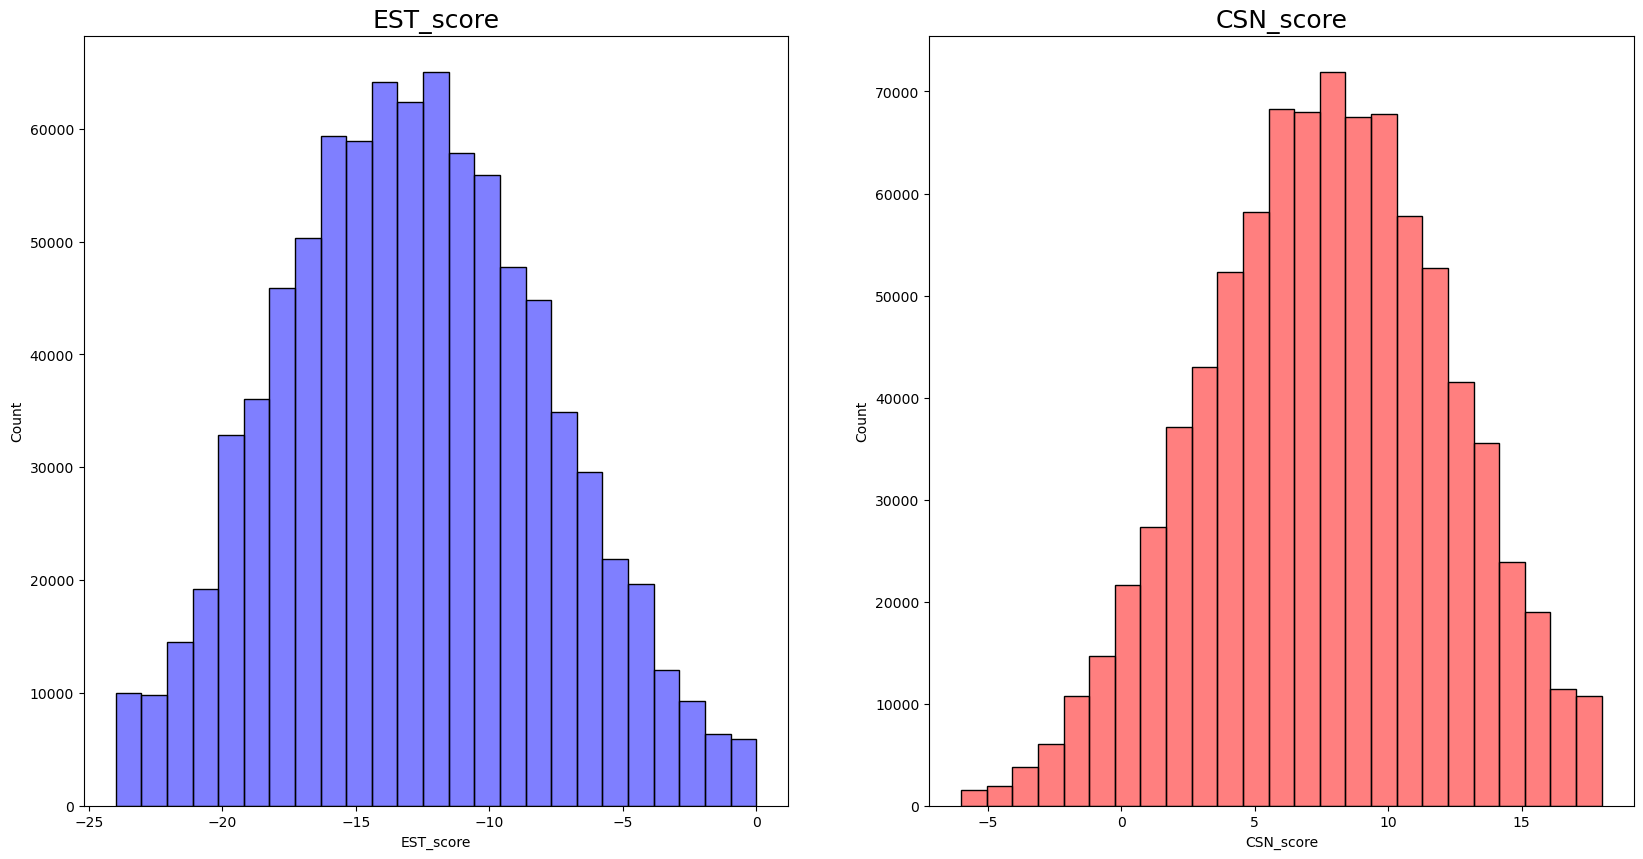

In [15]:
# Distribuzione
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.histplot(data_12_items['EST_score'], bins=25, color='blue', alpha=.5)
plt.title('EST_score', fontsize=18)

plt.subplot(1,2,2)
sns.histplot(data_12_items['CSN_score'], bins=25, color='red', alpha=.5)
plt.title('CSN_score', fontsize=18)


In [16]:
data_12_items[['EST_score','CSN_score']].describe()

# EST --> minimo -24 MASSIMO 0
# CSN --> minimo -6  MASSIMO 18

,EST_score,CSN_score
count,874434.000000,874434.000000
mean,-12.795913,7.714141
std,5.115872,4.702610
min,-24.000000,-6.000000
25%,-17.000000,4.000000
50%,-13.000000,8.000000
75%,-9.000000,11.000000
max,0.000000,18.000000


In [17]:
data_to_test = data_12_items.drop([ 'EST_score',  'CSN_score' ], axis=1)

data_to_test.head()

,EST3,EST4,EST5,EST6,EST9,EST10,CSN1,CSN4,CSN5,CSN8,CSN9,CSN10
0,4.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0
1,4.0,1.0,3.0,1.0,3.0,1.0,3.0,3.0,3.0,3.0,5.0,3.0
2,4.0,2.0,2.0,2.0,1.0,3.0,4.0,2.0,3.0,2.0,4.0,2.0
3,3.0,2.0,3.0,2.0,4.0,3.0,2.0,4.0,1.0,3.0,1.0,4.0
4,5.0,3.0,1.0,1.0,3.0,2.0,5.0,1.0,3.0,1.0,5.0,5.0


In [18]:
data_to_test.shape

(874434, 12)

In [19]:
# faccio il cast di data_to_test e converto tutto in int8
data_to_test = data_to_test.astype('int8')

# Kmeans

Trovo k OTTIMALE: 

1. Elbow method

k=2: wcss=12269870.995922593
k=3: wcss=11172342.747630546
k=4: wcss=10262184.669215603
k=5: wcss=9885618.03296779
k=6: wcss=9574517.342433916
k=7: wcss=9269107.782234719
k=8: wcss=9025995.661044873
k=9: wcss=8851144.303018577
k=10: wcss=8689229.373206498


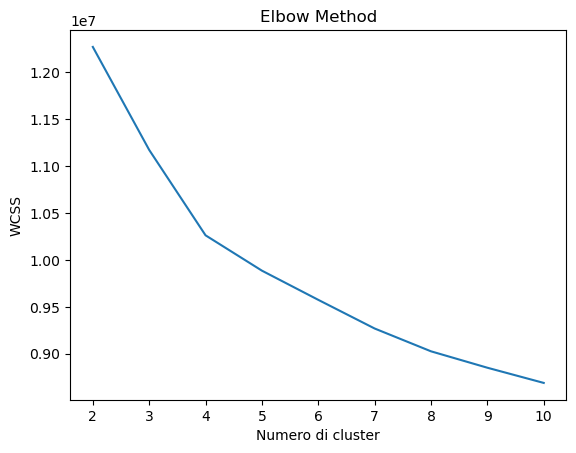

In [21]:
wcss_List=[]

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_to_test)
    wcss = kmeans.inertia_ # wcss = within-cluster sum of squares (somma dei quadrati all'interno del cluster)
    print(f'k={k}: wcss={wcss}')
    wcss_List.append(wcss)
    
""" 
# stampa i risultati di wcss[k+1] - wcss[k]
for i in range(0, len(wcss_List)):
    print(wcss_List[i])
    print(f'k={i+3}-{i+2}: wcss_diff={wcss_List[i+1]-wcss_List[i]}')
    #print(f'k={i+2}-{i+1}: wcss_diff={wcss_List[i]-wcss_List[i-1]}') 
"""
  
plt.plot(range(2, 11), wcss_List)
plt.xlabel('Numero di cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


By default, the scoring parameter metric is set to distortion, which computes the sum of squared distances from each point to its assigned center. However, two other metrics can also be used with the KElbowVisualizer – silhouette and calinski_harabasz. The silhouette score calculates the mean Silhouette Coefficient of all samples, while the calinski_harabasz score computes the ratio of dispersion between and within clusters.

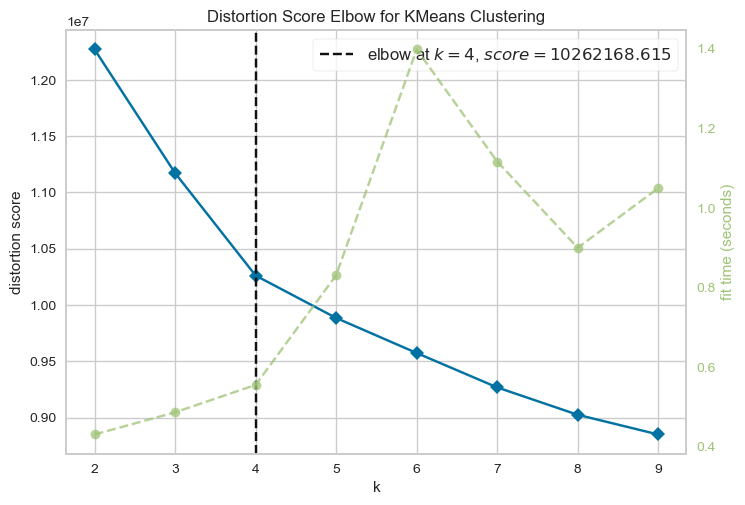

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(data_to_test)        
visualizer.show()  

In [24]:
Clusters_df = pd.DataFrame()
Clusters_df['EST_score'] = data_12_items["EST_score"]
Clusters_df['CSN_score'] = data_12_items["CSN_score"]


- Definisco i cluster (k=4)

In [25]:

# Definisco 4 cluster
kmeans = KMeans(n_clusters=4, random_state=42)
k_fit = kmeans.fit(data_to_test)

In [26]:
predictions = k_fit.labels_
Clusters_df['Clusters_Kmeans'] = predictions
Clusters_df.head()

,EST_score,CSN_score,Clusters_Kmeans
0,-11.0,9.0,1
1,-11.0,8.0,1
2,-10.0,9.0,2
3,-13.0,1.0,1
4,-9.0,16.0,2


C:\Users\TirocinioMatteo\AppData\Local\Temp\ipykernel_21028\1790328769.py:8: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\TirocinioMatteo\.miniconda\envs\loan_default_prediction\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


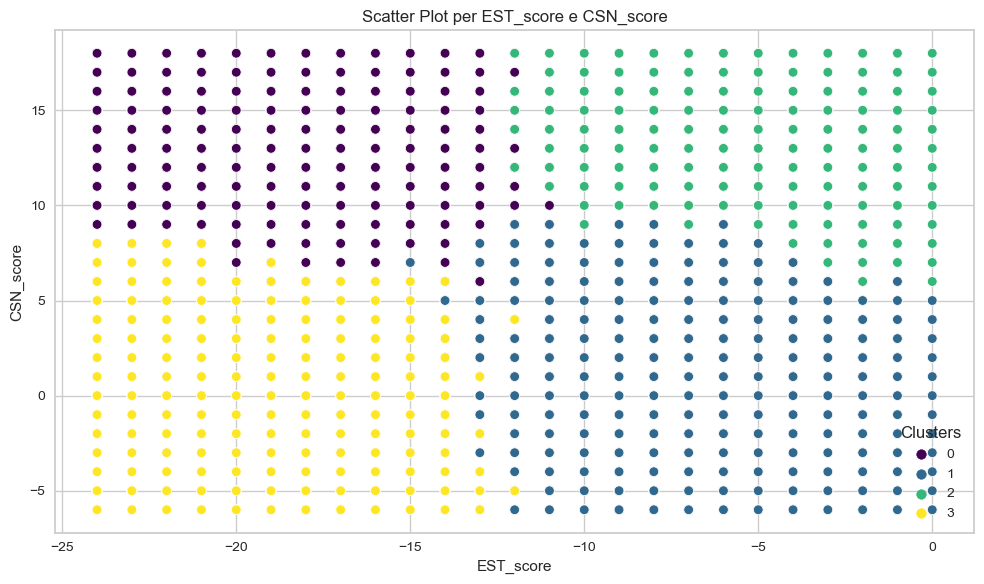

In [27]:
# plotta sulle x EST_score e sulle y CSN_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Clusters_df, x='EST_score', y='CSN_score', hue='Clusters_Kmeans', palette='viridis')
plt.title('Scatter Plot per EST_score e CSN_score')
plt.xlabel('EST_score')
plt.ylabel('CSN_score')
plt.legend(title='Clusters')
plt.tight_layout()
plt.show()


# Tentativo con: Gaussian mixtures

-  (clusters senza raggruppamento ordinato)

In [21]:
#data_to_test = data_to_test.sample(1000, random_state=42) # se metto tutti i record esplode

# Crea l'oggetto GaussianMixture
# Puoi impostare i parametri come il numero di componenti e la covarianza
n_components = 4  # Numero di componenti (cluster) desiderato
gmm = GaussianMixture(n_components=n_components)

gmm.fit(data_to_test)

gmm_cluster_labels = gmm.predict(data_to_test)

print("Number of clusters detected by the algorithm:", len(set(gmm_cluster_labels)))

Clusters_df['Clusters_GMM'] = gmm_cluster_labels

Clusters_df.head()

Number of clusters detected by the algorithm: 4


,EST_score,CSN_score,Clusters_Kmeans,Clusters_Dbscan,Clusters_GMM
0,-11.0,9.0,1,-1,3
1,-11.0,8.0,1,-1,3
2,-10.0,9.0,2,-1,3
3,-13.0,1.0,1,-1,2
4,-9.0,16.0,2,-1,0


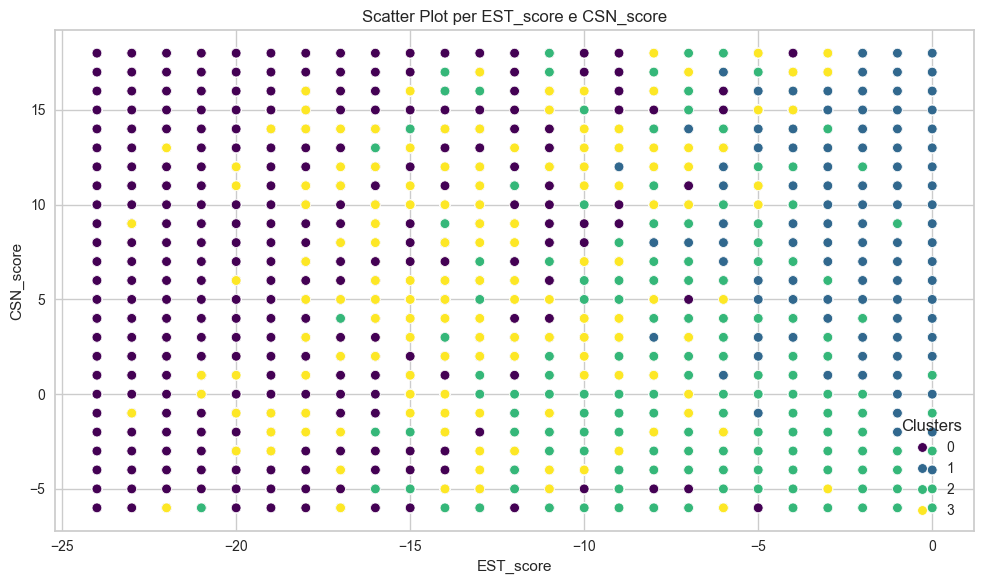

In [22]:
# plotta sulle x EST_score e sulle y CSN_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=Clusters_df, x='EST_score', y='CSN_score', hue='Clusters_GMM', palette='viridis')
plt.title('Scatter Plot per EST_score e CSN_score')
plt.xlabel('EST_score')
plt.ylabel('CSN_score')
plt.legend(title='Clusters')
plt.tight_layout()
plt.show()